# Heart Disease Prediction

# Understanding business context


Our input contains the data of both the patients having and not having heart problems.
This data is obtained from Cleveland database. Originally, it contains 73 attributes, but we are now working only with 14 of them.

Based on the patient's conditions, we are going to predict whether the patient has Heart problem or not.


## Data Fields


Attribute Information: 
> 1. age: The person's age in years
> 2. sex: The person's sex (1 = male, 0 = female)
> 3. cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
> 4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
> 5. chol: The person's cholesterol measurement in mg/dl
> 6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
> 7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
> 8. thalach: The person's maximum heart rate achieved
> 9. exang: Exercise induced angina (1 = yes; 0 = no)
> 10. ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
> 11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
> 12. ca: The number of major vessels (0-3) colored by flourosopy 
> 13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

# Ingest

## Import Libraries

In [0]:
# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

In [0]:
url = 'https://raw.github.com/krithikaceg/Heart-Disease-prediction/master/heart.csv'
df = pd.read_csv(url)
#print first 10 rows
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1


## Data types in the dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


The above data types looks fine and do not require any data type conversion.

In [0]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Healthy vs Non-healthy

In [0]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("Number of people without heart disease: "+ str(healthy))
print ("Number of people with heart disease: "+ str(sick))

Number of people without heart disease: 138
Number of people with heart disease: 165


This indicates that we have more or less same proportion of healthy vs non-healthy patient data. 

In [0]:
df.shape

(303, 14)

## Null check

In [0]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Column rename

In [0]:
df=df.rename(columns={'age':'Age',
                      'sex':'Sex',
                      'cp':'Cp',
                      'trestbps':'Trestbps',
                      'chol':'Chol',
                      'fbs':'Fbs',
                      'restecg':'Restecg',
                      'thalach':'Thalach',
                      'exang':'Exang',
                      'oldpeak':'Oldpeak',
                      'slope':'Slope',
                      'ca':'Ca',
                      'thal':'Thal',
                      'target':'Target'
                     })

# EDA

## Pair Plot

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 144x144 with 0 Axes>

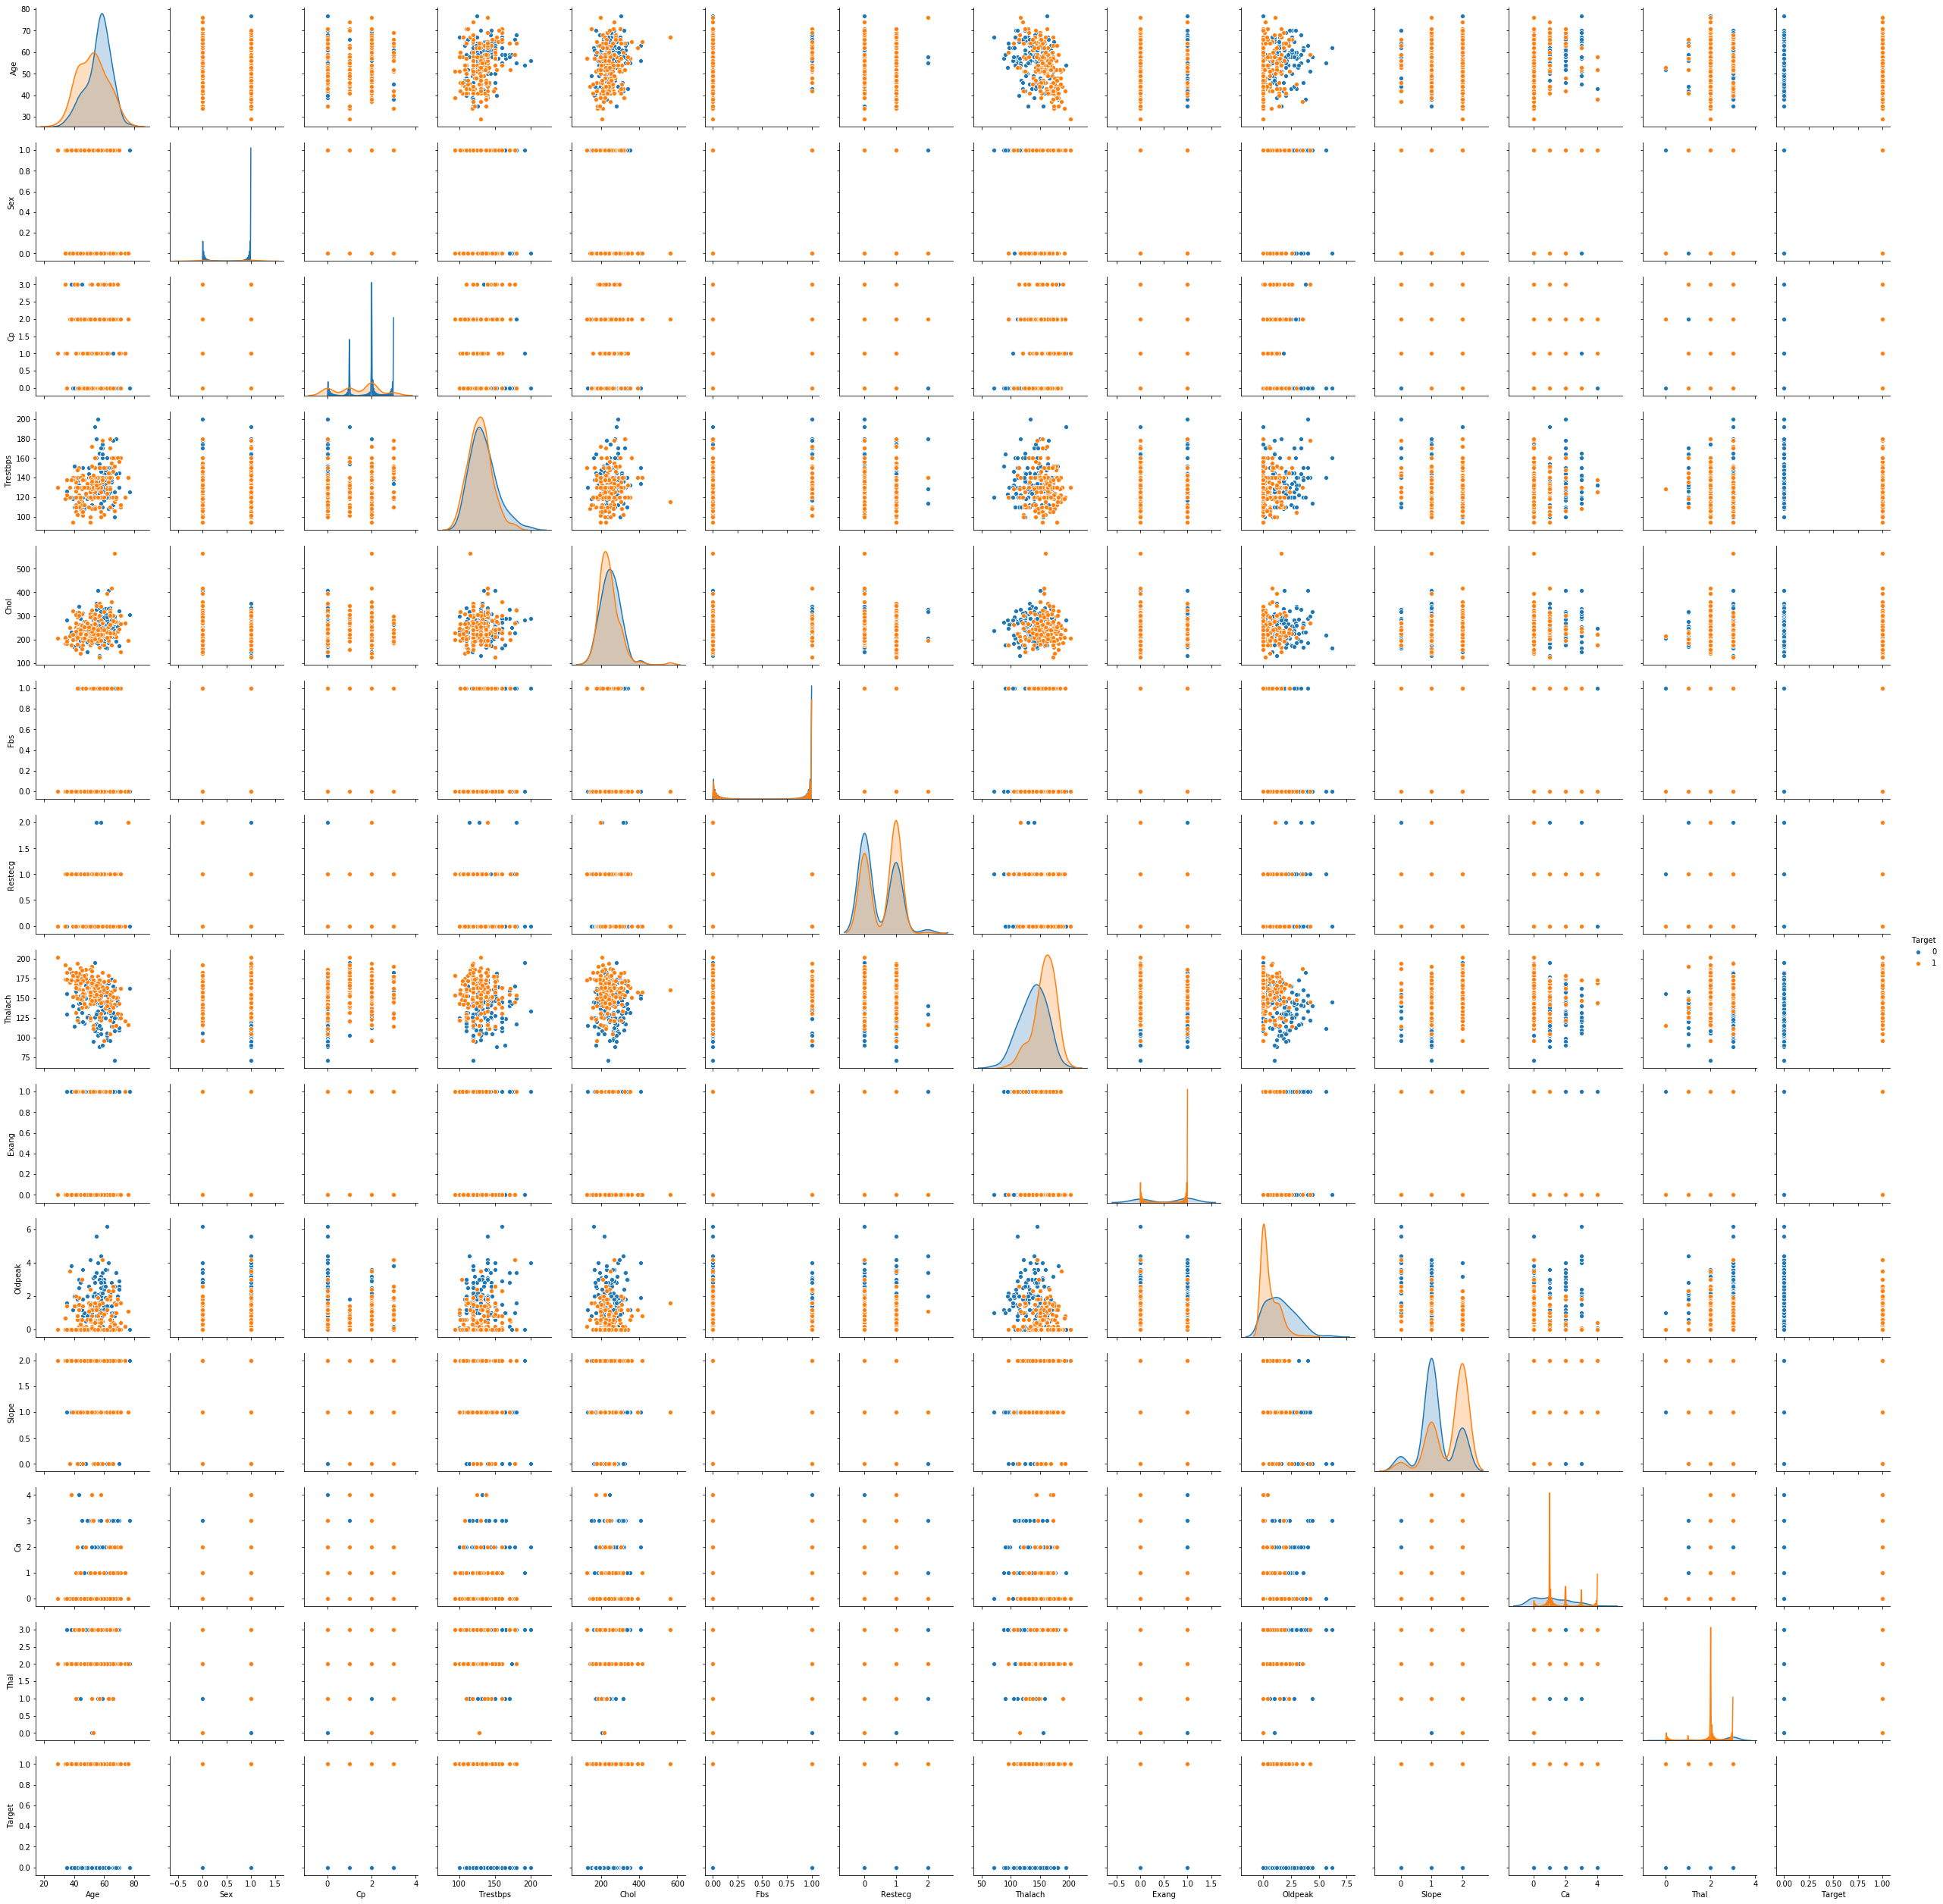

In [0]:
fig = plt.figure(figsize=(2,2))
sns.pairplot(df,hue="Target")
plt.show()

## Count plot

In [0]:
df['Age_Bin'] = pd.cut(x=df['Age'], bins=4, labels=['29-40', '41-52', '53-65', '66-77'])

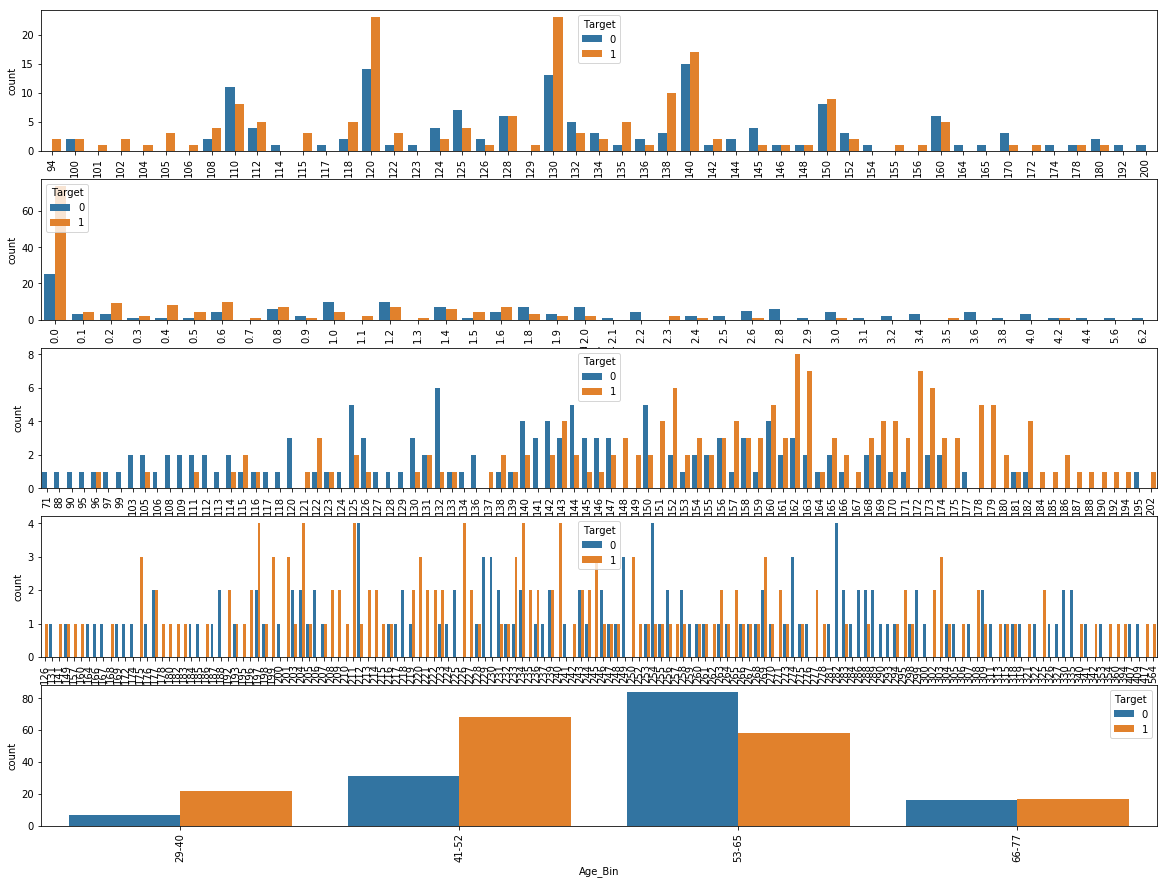

In [0]:
fig = plt.figure(figsize=(20, 15))


plt.subplot(511)
plt.xlabel("Trestbps")
plt.ylabel("Count")
#plt.tight_layout()
plt.xticks(rotation=90)
ax = sns.countplot(x="Trestbps", hue="Target", data=df)

plt.subplot(512)
plt.xlabel("Oldpeak")
plt.xticks(rotation=90)
ax = sns.countplot(x='Oldpeak',  hue="Target", data=df)
plt.xlabel("Thalach")

plt.subplot(513)
plt.xticks(rotation=90)
ax = sns.countplot(x="Thalach", hue="Target", data=df)
plt.xlabel("Chol")

plt.subplot(514)
plt.xticks(rotation=90)
ax = sns.countplot(x="Chol", hue="Target", data=df)
plt.xlabel("Chol")

plt.subplot(515)
plt.xticks(rotation=90)
ax = sns.countplot(x='Age_Bin', hue="Target", data=df)


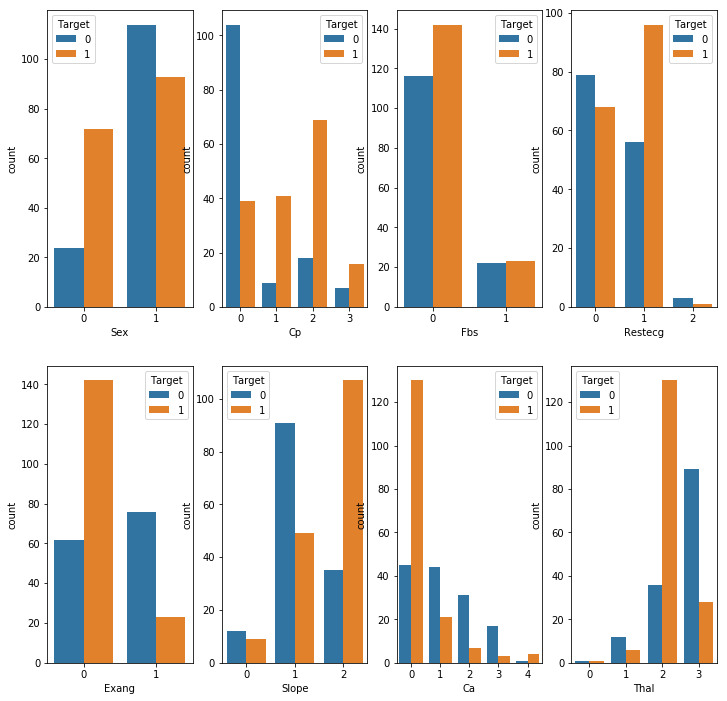

In [0]:
fig = plt.figure(figsize=(12, 12))


columns_considered = ['Sex', 'Cp', 'Fbs', 'Restecg', 
       'Exang', 'Slope', 'Ca', 'Thal']
i=1
for col in columns_considered:
  #fig = plt.figure(figsize=(4, 4))
  plt.subplot(2, 4, i)
  ax = sns.countplot(x=col, hue="Target", data=df)
  i += 1

## Correlation Heat Map

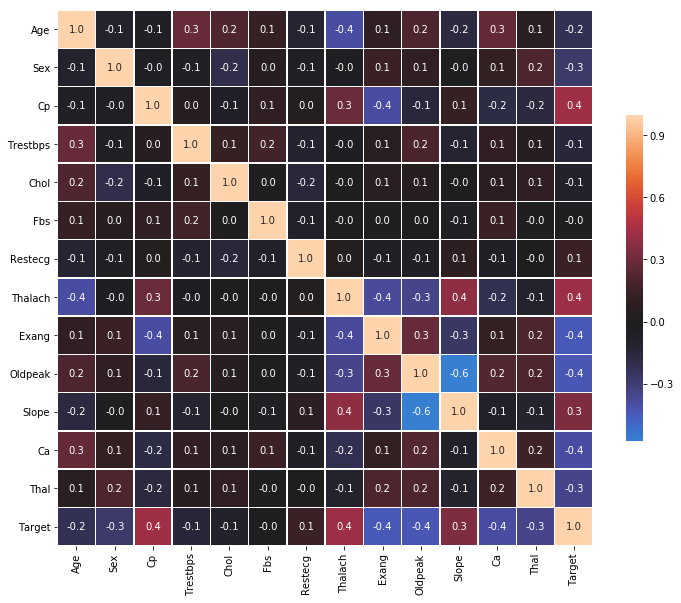

In [0]:
corr = df.corr()

# plot the heatmap
fig = plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True,fmt='.1f',center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Model

## Split train and test data

In [0]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

## SVC

In [0]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))



0.5164835164835165


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Hyper parameter tuning using GridSearchCV

In [0]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

score ='recall'

print("# Tuning hyper-parameters for %s" % score)
print()

try:
  clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                     scoring='%s_macro' % score)
  clf.fit(X_train, y_train)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
except:
  None



y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(clf.score(X_test, y_test))

# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        44
           1       0.73      0.87      0.80        47

   micro avg       0.77      0.77      0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91


0.765715667311412


## Logistic Regression

In [0]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))



0.8021978021978022


### Hyper parameter tuning using GridSearchCV

In [0]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = {#'dual': [True,False], 
                    #'max_iter':[100,110,120,130,140], 
                    'C': [0.01, 0.1, 1, 10, 100, 1000],
                    #'penalty': ['l1', 'l2'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    #'multi_class': ['ovr', 'multinomial', 'auto']                   
                   }
score = 'recall'
print("# Tuning hyper-parameters for %s" % score)
print()
try:
  clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                     scoring='%s_macro' % score)
  clf.fit(X_train, y_train)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
except:
  None



y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(clf.score(X_test, y_test))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1, 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


0.8324468085106382


## Random Forest

In [0]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9265850945494994


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Hyper parameter tuning using RandomForest

In [0]:
import warnings
warnings.filterwarnings('ignore')

tuned_parameters = {'n_estimators': [10, 20, 50, 100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 20],
              'max_features': ['auto', 'sqrt', 'log2']
             }
score = 'recall'
print("# Tuning hyper-parameters for %s" % score)
print()

try:
  clf1 = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                     scoring='%s_macro' % score)
  clf1.fit(X_train, y_train)

  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
except:
  None

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(clf.score(X_test, y_test))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        44
           1       0.73      0.87      0.80        47

   micro avg       0.77      0.77      0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91


0.7692307692307693


## Best model

Based on the above results after Hyper parameter tuning for each of SVC, RandomForest, LogisticRegression, we have arrived at a conclusion that Logistic regression performs the best.

In [0]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

import statsmodels.api as sm

model = LogisticRegression(C= 1, solver = 'lbfgs')
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
parameters = model.coef_
print("Score: %s" %clf.score(X_test, y_test))
print("Accuracy: %s" %accuracy)
print("Parameters are %s" %parameters)


# Logit
logit = sm.Logit(y_train, X_train)

# fit the model
result = logit.fit()
result.summary()

Score: 0.8351648351648352
Accuracy: 0.8351648351648352
Parameters are [[ 0.02219766 -1.49436667  0.74471438 -0.00845611 -0.00444627 -0.48120737
   0.2450421   0.02901004 -0.79615761 -0.68773797  0.24967978 -0.76295646
  -0.78135109]]
Optimization terminated successfully.
         Current function value: 0.333189
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Tue, 14 May 2019   Pseudo R-squ.:                  0.5148
Time:                        08:29:45   Log-Likelihood:                -70.636
converged:                       True   LL-Null:                       -145.59
                                        LLR p-value:                 5.943e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0272      0.023      1.162      0.245      -0.019       0.073
x2            -1.9483      0.545     -3.573      0.000      -3.017      -0.880
x3             0.8317      0.229      3.624      0.000       0.382       1.282
x4            -0.0073      0.012     -0.587      0.557      -0.032       0.017
x5            -0.0059      0.004     -1.372      0.170      -0.014       0.003
x6            -0.8230      0.630     -1.306      0.192      -2.058       0.412
x7             0.2575      0.438      0.588      0.556      -0.600       1.115
x8             0.0321      0.010      3.098      0.002       0.012       0.052
x9            -0.8847      0.488     -1.813      0.070      -1.841       0.072
x10           -0.7473      0.284     -2.635      0.008      -1.303      -0.192
x11            0.2540      0.444      0.572      0.567      -0.616       1.124
x12           -0.8550      0.248     -3.451      0.001      -1.340      -0.369
x13           -0.8276      0.341     -2.425      0.015      -1.496      -0.159
==============================================================================
"""

### Confusion Matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


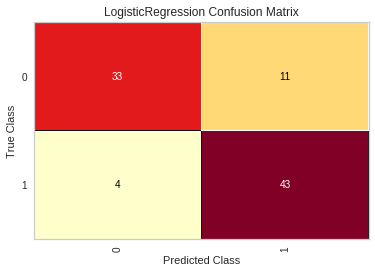

In [0]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()


As we can see from the confusion matrix, 4 out of 91 value predicted are false negative whereas 11 out of 91 values predicted are false positives.

In health care, false negatives are more serious than false positives.

### Precision and Recall

In order to find the accuracy of our model, let's calculate precision and recall.

Precision tells us how good our model is in finding the relevant data points. We get 80% precision.

Recall tells about our model's ability in finding data points of interest. we have got 81% recall.

In [0]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

   micro avg       0.80      0.80      0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



### ROC AUC

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


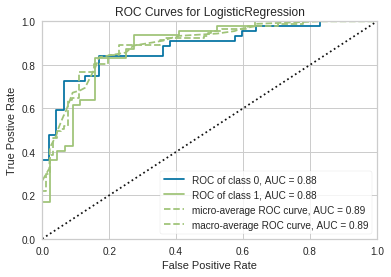

In [0]:
from yellowbrick.classifier import ROCAUC
clf = LogisticRegression()
classes=[0,1]

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

**Model Comparison: SVM vs. Logistic Regression vs. Random Forest**

Indicators-Weighted Avg | SVM | LogisticRegression | Random Forest
--- | --- | --- | ---
Precision| 0.78 | 0.84 | 0.78
Recall | 0.77 | 0.84 | 0.77
F1-score | 0.77 | 0.83 | 0.77
Support | 91 | 91 | 91


In Healthcare, Type II error (False Negative) is not preferred compared to Type I error (False Positive). 
We go by recall score, to choose the model. We found the Logistic Regression is better with precision and F1-score as well.

## AutoML

In [0]:
pip install -U h2o

     |████████████████████████████████| 121.8MB 214kB/s 
  Stored in directory: /root/.cache/pip/wheels/36/73/57/2ea67a8a35ea9114f7d66cc8c5ec46c915698c909321f8a17d
Successfully built h2o


In [0]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

train = h2o.import_file(url)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4tq4kk_r
  JVM stdout: /tmp/tmp4tq4kk_r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4tq4kk_r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,"7 days, 4 hours and 27 minutes"
H2O cluster name:,H2O_from_python_unknownUser_xs032b
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
x = train.columns
y='target'

x.remove(y)

train[y] = train[y].asfactor()

aml = H2OAutoML(max_runtime_secs = 30)
aml.train(x=x, y=y, training_frame = train)

lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190514_075125,0.906061,0.387758,0.172266,0.35028,0.122696
XGBoost_grid_1_AutoML_20190514_075125_model_1,0.901932,0.455177,0.181884,0.376791,0.141971
XGBoost_3_AutoML_20190514_075125,0.901186,0.398479,0.185507,0.356056,0.126776
XGBoost_2_AutoML_20190514_075125,0.899495,0.421978,0.185441,0.361938,0.130999
StackedEnsemble_AllModels_AutoML_20190514_075125,0.898463,0.395321,0.177668,0.354482,0.125658
StackedEnsemble_BestOfFamily_AutoML_20190514_075125,0.895828,0.406242,0.174638,0.359662,0.129357
GBM_3_AutoML_20190514_075125,0.892885,0.409045,0.159684,0.361096,0.130391
GLM_grid_1_AutoML_20190514_075125_model_1,0.892446,0.402469,0.174045,0.358261,0.128351
GBM_4_AutoML_20190514_075125,0.887,0.419461,0.192161,0.368071,0.135476
GBM_2_AutoML_20190514_075125,0.884629,0.428865,0.192227,0.371412,0.137947


In [0]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20190514_075125


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08980921558804873
RMSE: 0.2996818572887734
LogLoss: 0.30259919583492084
Mean Per-Class Error: 0.11844532279314879
AUC: 0.9529644268774703
pr_auc: 0.9468140278798679
Gini: 0.9059288537549406
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44805291295051575: 


,0,1,Error,Rate
0,112.0,26.0,0.1884,(26.0/138.0)
1,8.0,157.0,0.0485,(8.0/165.0)
Total,120.0,183.0,0.1122,(34.0/303.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4480529,0.9022989,177.0
max f2,0.2551589,0.9357061,205.0
max f0point5,0.6628847,0.9127517,139.0
max accuracy,0.4480529,0.8877888,177.0
max precision,0.9755446,1.0,0.0
max recall,0.1008200,1.0,241.0
max specificity,0.9755446,1.0,0.0
max absolute_mcc,0.4480529,0.7770557,177.0
max min_per_class_accuracy,0.5802985,0.8727273,155.0
max mean_per_class_accuracy,0.4480529,0.8815547,177.0


Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.29 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0132013,0.9717435,1.8363636,1.8363636,1.0,0.9739246,1.0,0.9739246,0.0242424,0.0242424,83.6363636,83.6363636
,2,0.0231023,0.9666861,1.8363636,1.8363636,1.0,0.9680534,1.0,0.9714084,0.0181818,0.0424242,83.6363636,83.6363636
,3,0.0330033,0.9619478,1.8363636,1.8363636,1.0,0.9637199,1.0,0.9691018,0.0181818,0.0606061,83.6363636,83.6363636
,4,0.0429043,0.9606768,1.8363636,1.8363636,1.0,0.9610973,1.0,0.9672546,0.0181818,0.0787879,83.6363636,83.6363636
,5,0.0594059,0.9566739,1.8363636,1.8363636,1.0,0.9578960,1.0,0.9646550,0.0303030,0.1090909,83.6363636,83.6363636
,6,0.1023102,0.9484167,1.8363636,1.8363636,1.0,0.9529798,1.0,0.9597589,0.0787879,0.1878788,83.6363636,83.6363636
,7,0.1518152,0.9289913,1.8363636,1.8363636,1.0,0.9397308,1.0,0.9532280,0.0909091,0.2787879,83.6363636,83.6363636
,8,0.2013201,0.9099970,1.7139394,1.8062593,0.9333333,0.9177299,0.9836066,0.9444990,0.0848485,0.3636364,71.3939394,80.6259314
,9,0.3003300,0.8441306,1.7139394,1.7758242,0.9333333,0.8735545,0.9670330,0.9211107,0.1696970,0.5333333,71.3939394,77.5824176
,10,0.3993399,0.7490066,1.7139394,1.7604808,0.9333333,0.7965763,0.9586777,0.8902344,0.1696970,0.7030303,71.3939394,76.0480841




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.1226961547530167
RMSE: 0.35028010898853035
LogLoss: 0.3877577572130421
Mean Per-Class Error: 0.17226613965744408
AUC: 0.906060606060606
pr_auc: 0.9066360338451313
Gini: 0.812121212121212
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4749037027359009: 


,0,1,Error,Rate
0,103.0,35.0,0.2536,(35.0/138.0)
1,15.0,150.0,0.0909,(15.0/165.0)
Total,118.0,185.0,0.165,(50.0/303.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4749037,0.8571429,182.0
max f2,0.2137428,0.9177928,225.0
max f0point5,0.6840705,0.8516887,126.0
max accuracy,0.4749037,0.8349835,182.0
max precision,0.9805110,1.0,0.0
max recall,0.0606634,1.0,274.0
max specificity,0.9805110,1.0,0.0
max absolute_mcc,0.4749037,0.6694312,182.0
max min_per_class_accuracy,0.5828885,0.8043478,157.0
max mean_per_class_accuracy,0.4749037,0.8277339,182.0


Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0132013,0.9661031,1.8363636,1.8363636,1.0,0.9734581,1.0,0.9734581,0.0242424,0.0242424,83.6363636,83.6363636
,2,0.0231023,0.9633409,1.8363636,1.8363636,1.0,0.9637844,1.0,0.9693122,0.0181818,0.0424242,83.6363636,83.6363636
,3,0.0330033,0.9567749,1.8363636,1.8363636,1.0,0.9586107,1.0,0.9661017,0.0181818,0.0606061,83.6363636,83.6363636
,4,0.0429043,0.9538858,1.2242424,1.6951049,0.6666667,0.9553977,0.9230769,0.9636316,0.0121212,0.0727273,22.4242424,69.5104895
,5,0.0528053,0.9487219,1.8363636,1.7215909,1.0,0.9506581,0.9375,0.9611991,0.0181818,0.0909091,83.6363636,72.1590909
,6,0.1023102,0.9398768,1.8363636,1.7771261,1.0,0.9432883,0.9677419,0.9525325,0.0909091,0.1818182,83.6363636,77.7126100
,7,0.1518152,0.9173619,1.8363636,1.7964427,1.0,0.9309214,0.9782609,0.9454854,0.0909091,0.2727273,83.6363636,79.6442688
,8,0.2013201,0.8880536,1.7139394,1.7761550,0.9333333,0.9027148,0.9672131,0.9349681,0.0848485,0.3575758,71.3939394,77.6154993
,9,0.3003300,0.8306461,1.7751515,1.7758242,0.9666667,0.8591936,0.9670330,0.9099875,0.1757576,0.5333333,77.5151515,77.5824176
,10,0.3993399,0.7141129,1.2242424,1.6390684,0.6666667,0.7783361,0.8925620,0.8773466,0.1212121,0.6545455,22.4242424,63.9068370



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8515301,0.0253394,0.9016393,0.8360656,0.8032787,0.8333333,0.8833333
auc,0.9086981,0.0180394,0.9253247,0.9015151,0.8625541,0.9191919,0.9349046
err,0.1484699,0.0253394,0.0983607,0.1639344,0.1967213,0.1666667,0.1166667
err_count,9.0,1.5491934,6.0,10.0,12.0,10.0,7.0
f0point5,0.8398287,0.0342887,0.9235669,0.8048781,0.7936508,0.8121827,0.8648649
f1,0.8748555,0.0188573,0.90625,0.8684211,0.8333333,0.8648649,0.9014084
f2,0.9151306,0.0190638,0.8895705,0.9428572,0.877193,0.9248555,0.9411765
lift_top_group,1.8363637,0.0104973,1.8484849,1.8484849,1.8484849,1.8181819,1.8181819
logloss,0.3875153,0.0319205,0.3797451,0.384224,0.4720343,0.3625452,0.3390280
max_per_class_error,0.2710678,0.0621810,0.1212121,0.3571429,0.3214286,0.3333333,0.2222222


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-05-14 07:51:30,5.219 sec,0.0,0.5,0.6931472,0.5,0.0,1.0,0.4554455
,2019-05-14 07:51:30,5.264 sec,5.0,0.4575204,0.6111523,0.9213219,0.7695606,1.8363636,0.1320132
,2019-05-14 07:51:30,5.292 sec,10.0,0.4235955,0.5485319,0.9308959,0.8934824,1.8363636,0.1353135
,2019-05-14 07:51:30,5.328 sec,15.0,0.3992066,0.5041552,0.9372639,0.9224271,1.8363636,0.1254125
,2019-05-14 07:51:30,5.354 sec,20.0,0.3801267,0.4690210,0.9402942,0.9255657,1.8363636,0.1221122
,2019-05-14 07:51:30,5.374 sec,25.0,0.3653676,0.4407895,0.9386254,0.9242084,1.8363636,0.1386139
,2019-05-14 07:51:30,5.394 sec,30.0,0.3511691,0.4141363,0.9440053,0.9337490,1.8363636,0.1320132
,2019-05-14 07:51:30,5.414 sec,35.0,0.3404366,0.3926932,0.9459816,0.9354199,1.8363636,0.1320132
,2019-05-14 07:51:30,5.436 sec,40.0,0.3337492,0.3784430,0.9462451,0.9355553,1.8363636,0.1320132
,2019-05-14 07:51:30,5.457 sec,45.0,0.3270815,0.3646120,0.9472991,0.9422586,1.8363636,0.1287129


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cp,403.8475037,1.0,0.2295562
thal,304.8292236,0.7548127,0.1732719
ca,301.8698120,0.7474847,0.1715897
oldpeak,165.2477417,0.4091835,0.0939306
thalach,117.3887177,0.2906759,0.0667264
exang,113.4900894,0.2810221,0.0645104
slope,101.0105972,0.2501206,0.0574167
sex,75.3228378,0.1865131,0.0428152
﻿age,74.9309311,0.1855426,0.0425925
chol,51.9923820,0.1287426,0.0295537


# Recommendations

From our model results, we find that 'sex' is negatively correlated with the chances of getting heart disease, we can say that men have higher chance of getting heart disease than women.